In [22]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
from navec import Navec
from slovnet.model.emb import NavecEmbedding
from tg.projects.retell.retell_utils.metrics import get_cosine_sim, get_jaccard_index,plot_bar_jac_cos_metric
from pathlib import Path
from tg.projects.retell.retell_utils.corpora_sugar import CorpusSugar
from tg.grammar_ru.corpus import CorpusReader
import pyarrow.parquet as pq
from tg.grammar_ru.common.loc import Loc

In [23]:
print(Loc.all_featurized_retell)


c:\users\nikya\pycharmprojects\grammar\grammar_ru\tg\projects\retell\featurized_corpuses\All retell.featurized.retell.corpus.zip


In [24]:
ru_retell_corpus = CorpusReader(Path(Loc.root_path/'tg/projects/retell/featurized_corpuses/All retell.featurized.retell.corpus.zip'))
ru_text_corpus = CorpusReader(Path(Loc.root_path/'tg/projects/retell/featurized_corpuses/books.featurized.zip'))
martin_mapping = ru_retell_corpus.read_mapping_data()

In [25]:
ru_corpus_sugar = CorpusSugar(ru_text_corpus, ru_retell_corpus)
ru_books, ru_retell_books, ru_summar_books = ru_corpus_sugar.get_books_retell_info_by_author('Мартин')

ru_retell_books[1]

,filename,timestamp,part_index,token_count,character_count,ordinal,header_0,headers,author,book_name,text_type,max_id
file_id,,,,,,,,,,,,
063b25b0-9629-486f-8c37-25234e51e3a2,Мартин-Игра престолов (роман)-retell.md,2023-04-14 00:00:09.270759,0,631,2976,633,"Игра_престолов,_Пролог","Игра_престолов,_Пролог",Мартин,Игра престолов (роман),retell,6462295
e746b252-6f23-4fc7-8c65-57ab0ca455a0,Мартин-Игра престолов (роман)-retell.md,2023-04-14 00:00:09.289860,1,194,957,634,"Игра_престолов,_Бран_I","Игра_престолов,_Бран_I",Мартин,Игра престолов (роман),retell,6472490
126d0a27-70f4-4082-a8cc-07b516d63a3f,Мартин-Игра престолов (роман)-retell.md,2023-04-14 00:00:09.307264,2,122,589,635,"Игра_престолов,_Кейтилин_I","Игра_престолов,_Кейтилин_I",Мартин,Игра престолов (роман),retell,6482613
b36ea2c8-7683-433d-a8e0-fca953237ed8,Мартин-Игра престолов (роман)-retell.md,2023-04-14 00:00:09.324803,3,173,849,636,"Игра_престолов,_Дейнерис_I","Игра_престолов,_Дейнерис_I",Мартин,Игра престолов (роман),retell,6492787
9c227618-3cd9-4e30-8ad5-b59a286a9a48,Мартин-Игра престолов (роман)-retell.md,2023-04-14 00:00:09.347421,4,153,754,637,"Игра_престолов,_Эддард_I","Игра_престолов,_Эддард_I",Мартин,Игра престолов (роман),retell,6502941
...,...,...,...,...,...,...,...,...,...,...,...,...
4ec5a1ba-6e94-45f6-ab18-5f7a7ed0915a,Мартин-Игра престолов (роман)-retell.md,2023-04-14 00:00:10.599325,68,307,1297,701,"Игра_престолов,_Дейнерис_IX","Игра_престолов,_Дейнерис_IX",Мартин,Игра престолов (роман),retell,7170548
aff21a20-6b31-4aeb-af9f-99c0fbcf58d0,Мартин-Игра престолов (роман)-retell.md,2023-04-14 00:00:10.616936,69,527,2638,702,"Игра_престолов,_Тирион_IX","Игра_престолов,_Тирион_IX",Мартин,Игра престолов (роман),retell,7181076
6567a4a5-f3e0-4d98-9784-fbc3522c874d,Мартин-Игра престолов (роман)-retell.md,2023-04-14 00:00:10.635170,70,598,2689,703,"Игра_престолов,_Джон_IX","Игра_престолов,_Джон_IX",Мартин,Игра престолов (роман),retell,7191675


In [26]:
ru_book = ru_retell_books[1]
ru_retell = []
for chapter in ru_book.index:
    chptr = ru_retell_corpus.get_bundles([chapter]).single().src
    sentences_id = np.array(chptr['sentence_id'].unique())
    sentences = [chptr['word'][chptr['sentence_id'] == sentence_id] for sentence_id in sentences_id]
    ru_retell.append("\n".join(" ".join(sentence.values) for sentence in sentences))

print(ru_retell[0])

Гаред , Уилл и Уэймар Ройс , три разведчика из Ночного Дозора , преследуют банду налётчиков-одичалых в Зачарованном Лесу .
Уилл докладывает о нахождении этих одичалых , заявляя , что они все мертвы .
Гаред , старый человек , служивший в Дозоре десятилетия , встревожен , и настаивает на возвращении в Чёрный Замок - им необходимо преодолеть восемь-девять дней пути , и если пойдет снег , дни станут неделями .
Однако их лидером является восемнадцатилетний дворянин Уэймар , который поднимает старика на смех и начинает расспрашивать Уилла о деталях увиденного .
Уилл поясняет , что нашел лагерь одичалых .
Их навес был покрыт снегом , никакого огня не было , а тела не двигались все то время , пока он смотрел .
Они были мертвы , но никакой крови не было видно .
Ройс предполагает , что они просто спали , но разведчик с этим не согласен .
На дереве также была женщина , но и она не двигалась .
Гаред утверждает , что они просто замёрзли , но Уэймар указывает , что было не так холодно , чтобы они вс

In [27]:
en_retell_corpus = CorpusReader(Path(Loc.root_path/'tg/projects/retell/featurized_corpuses/eng/Martin.featurized.retell.corpus.zip'))
en_text_corpus = CorpusReader(Path(Loc.root_path/'tg/projects/retell/featurized_corpuses/books/eng/Martin.featurized.books.corpus.zip'))
martin_mapping = en_retell_corpus.read_mapping_data()

In [28]:
en_corpus_sugar = CorpusSugar(en_text_corpus, en_retell_corpus)
en_books, en_retell_books, en_summar_books = en_corpus_sugar.get_books_retell_info_by_author('Martin')

en_retell_books[2]

,filename,timestamp,part_index,token_count,character_count,ordinal,header_0,headers,author,book_name,text_type,max_id
file_id,,,,,,,,,,,,
464aa483-e700-4951-87ef-7c8d4de3574e,Martin-A Game of Thrones-retell.md,2023-08-10 22:21:35.300213,0,802,3056,116,Prologue-Chapter_0,Prologue-Chapter_0,Martin,A Game of Thrones,retell,1274431
5c8389e0-8e41-4b99-8329-50271c109acb,Martin-A Game of Thrones-retell.md,2023-08-10 22:21:35.320120,1,693,2766,117,Bran_I-Chapter_1,Bran_I-Chapter_1,Martin,A Game of Thrones,retell,1285125
b76938f7-c681-4c27-b528-981d989b52b0,Martin-A Game of Thrones-retell.md,2023-08-10 22:21:35.339326,2,477,1979,118,Catelyn_I-Chapter_2,Catelyn_I-Chapter_2,Martin,A Game of Thrones,retell,1295603
d3640f19-3272-4246-a8d3-187ef89a9db2,Martin-A Game of Thrones-retell.md,2023-08-10 22:21:35.357523,3,1067,4452,119,Daenerys_I-Chapter_3,Daenerys_I-Chapter_3,Martin,A Game of Thrones,retell,1306671
d27e0b2d-72d5-4027-b3c3-1ba12a7e99dc,Martin-A Game of Thrones-retell.md,2023-08-10 22:21:35.378132,4,921,3703,120,Eddard_I-Chapter_4,Eddard_I-Chapter_4,Martin,A Game of Thrones,retell,1317593
...,...,...,...,...,...,...,...,...,...,...,...,...
91e7b902-4303-48b6-a022-2c844a9b66b1,Martin-A Game of Thrones-retell.md,2023-08-10 22:21:36.844772,68,1339,5077,184,Daenerys_IX-Chapter_68,Daenerys_IX-Chapter_68,Martin,A Game of Thrones,retell,2034417
5ffe608a-177d-4cbd-8897-7890b814f468,Martin-A Game of Thrones-retell.md,2023-08-10 22:21:36.869826,69,1426,5875,185,Tyrion_IX-Chapter_69,Tyrion_IX-Chapter_69,Martin,A Game of Thrones,retell,2045844
fa47ad01-0256-40cf-985d-19188be20adc,Martin-A Game of Thrones-retell.md,2023-08-10 22:21:36.896820,70,1868,7090,186,Jon_IX-Chapter_70,Jon_IX-Chapter_70,Martin,A Game of Thrones,retell,2057713


In [29]:
from googletrans import Translator


translator = Translator()

book = en_retell_books[2]
true_retell = []


for chapter in book.index:
    chptr = en_retell_corpus.get_bundles([chapter]).single().src
    sentences_id = np.array(chptr['sentence_id'].unique())
    sentences = [chptr['word'][chptr['sentence_id'] == sentence_id] for sentence_id in sentences_id]
    true_retell.append("\n".join(" ".join(sentence.values) for sentence in sentences))


translations = translator.translate(true_retell, dest= 'ru')


trans_retell = []
for trans in translations:
    trans_retell.append(trans.text)

print(trans_retell[0])


Гаред, Уилл и сир Уэймар Ройс, трое рейнджеров Ночного Дозора, выслеживают банду одичалых налетчиков в призрачном лесу.
Уилл сообщил об обнаруженных им одичалых, заявив, что все они мертвы.
Гаред , пожилой человек , который десятилетиями служил в Ночном Дозоре , обеспокоен и настаивает на том , чтобы они вернулись к Стене ; впереди у них восемь или девять дней пути, которые могут превратиться в две недели, если пойдет снег.
Уэймар, восемнадцатилетний юноша благородного происхождения, однако, взял на себя командование и, не обращая внимания на опасения Гареда, снова спрашивает Уилла о подробностях того, что он видел.
Уилл объясняет, что видел лагерь одичалых.
Их навес был засыпан снегом, в них не было огня, и никто из одичалых не шевелился все время, пока он наблюдал.
Они лежали на земле, как мертвые, но крови не было видно.
Уэймар предполагает, что они, возможно, спали, но Уилл настаивает, что они мертвы.
На дереве была еще женщина, но она тоже не двинулась с места.
Гаред предполагает,

In [30]:
jaccard_sim = np.array([get_jaccard_index(ru_retell[i],trans_retell[i]) for i in range(len(trans_retell))])


In [31]:
def jac_metric(jac):
    fig, axis = plt.subplots(1, 1)
    axis.bar(range(len(jac)), jac)
    axis.set_title('Индекс Жаккара')

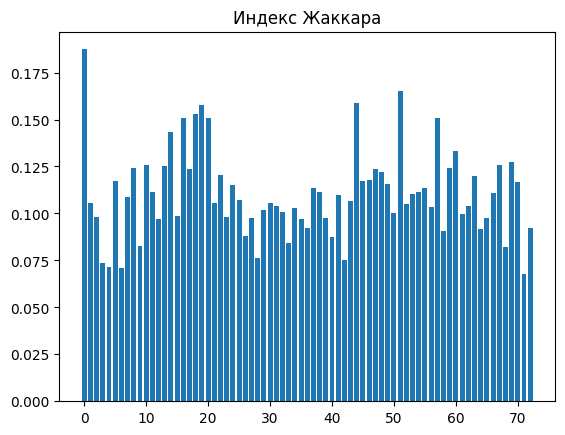

In [32]:
jac_metric(jaccard_sim)